<h3 style="text-align:center"> Project: Perform Facial Recognition with Deep Learning in Keras Using CNN </h3>

<h4 style="text-align:center"> Submitted by: Shraman Gupta </h4>

<h4> <u> Project Description </u></h4>

<b> Problem Statement: </b> Facial recognition is a biometric alternative that measures unique characteristics of a human face. Applications available today include flight check in, tagging friends and family members in photos, and “tailored” advertising. You are a computer vision engineer who needs to develop a face recognition programme with deep convolutional neural networks.

<b> Objective: </b> Use a deep convolutional neural network to perform facial recognition using Keras.

<b> Dataset Details: </b> ORL face database composed of 400 images of size 112 x 92. There are 40 people, 10 images per person. The images were taken at different times, lighting and facial expressions. The faces are in an upright position in frontal view, with a slight left-right rotation.

<h4> <b> Step 1: Input the required libraries </b> </h4>

In [1]:
# Data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

#Scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc

#Keras API Tensorflow 2 libraries
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, LeakyReLU
from keras.layers.noise import AlphaDropout
from keras.optimizers import Adam

from keras.utils.generic_utils import get_custom_objects
from keras import backend as K
from keras.callbacks import TensorBoard
from keras.utils.np_utils import to_categorical

print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.3.0


In [2]:
df = np.load('ORL_faces.npz') #loading dataset

<h4> <b> Step 2: Load the dataset and preprocess the data </b> </h4>

In [3]:
# Loading train and test dataset (data is already split into)
x_train = df['trainX']
y_train = df['trainY']
x_test = df['testX']
y_test = df['testY']

In [4]:
# Normalizing each image as each image is between 0-255 pixels
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

print('Training dataset shape: ',x_train.shape)
print('Testing dataset shape: ',x_test.shape)

Training dataset shape:  (240, 10304)
Testing dataset shape:  (160, 10304)


<h4> <b> Step 3: Split the dataset </b> </h4>

Split is done from Xtrain dataset into x_train and x_valid dataset

Here we considered only 10 % of the training dataset as validation dataset as number of images overall is very low (240)

In [5]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train,test_size=0.1,random_state=42)

<h4> <b> Step 4: Transform the images to equal sizes to feed in CNN </b> </h4>

When we feed images in CNN the size of each image must be same. 

* We will define the shape of image in terms of rows, columns
* To make equal size of all images (train, test, and valid dataset), we will use Reshape function


In [6]:
# Shape of image definition
rows = 112
columns = 92
image_shape = (rows,columns,1)

In [7]:
# Reshape function
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_valid = x_valid.reshape(x_valid.shape[0],*image_shape)

In [8]:
print('Training dataset modified shape: ',x_train.shape)
print('Testing dataset modified shape: ',x_test.shape)
print('Validating dataset modified shape: ',x_valid.shape)

Training dataset modified shape:  (216, 112, 92, 1)
Testing dataset modified shape:  (160, 112, 92, 1)
Validating dataset modified shape:  (24, 112, 92, 1)


<h4> Visualize images in different colormap </h4>

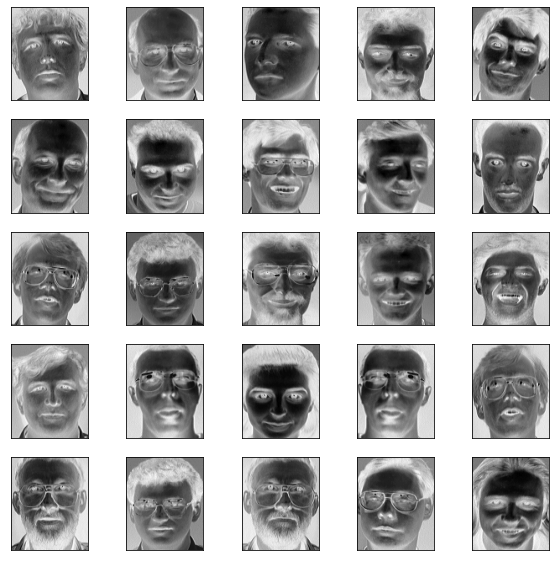

In [9]:
#visualize some inages 5 x 5 grid images in gray scale
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary) # for gray scale
plt.show()

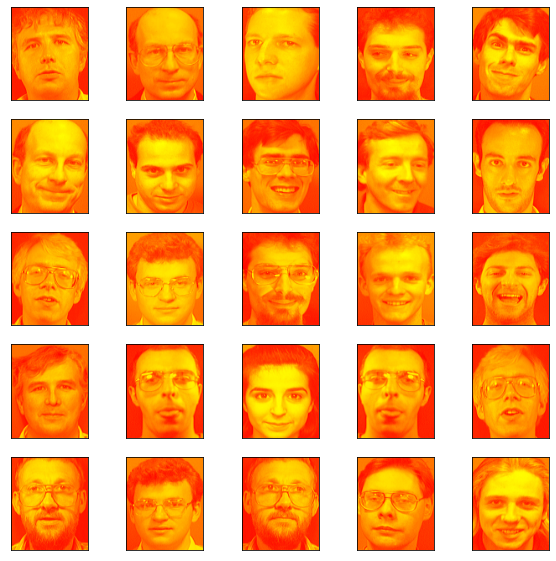

In [10]:
#visualize some inages 5 x 5 grid images in autumn
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i],cmap=plt.cm.autumn) # for autumn
plt.show()

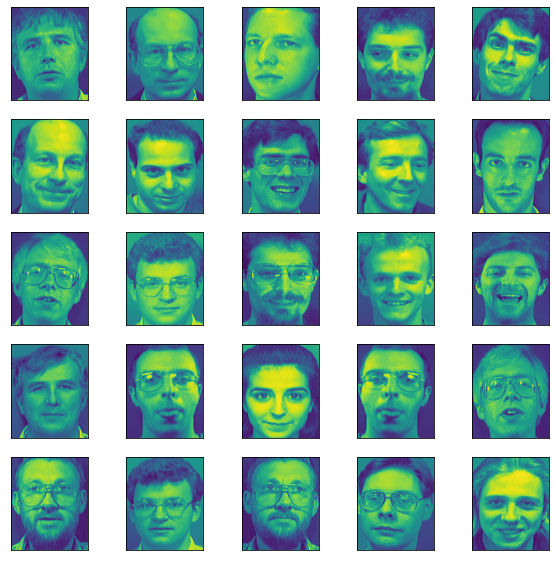

In [11]:
#visualize some inages 5 x 5 grid images by default
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
plt.show()

<h4> <b> Step 5: Build a CNN model that has 3 main layers: </b> </h4>

*  Convolutional Layer
*  Pooling Layer
*  Fully Connected Layer 

<i> The objective here is to build and train a CNN model which has accuracy above 90%. It depends upon number of iterations (Epochs) performed and what type of activation function is chosen to train the model. Before deciding the type of activation function chosen for our final model, we will train the model for different types of activation functions and then use that defined function for final prediction. </i>

 * Activation functions tested: ['sigmoid', 'relu', 'elu', 'leaky-relu', 'selu']
 * For 'selu' (Scaled Exponential Linear Unit),  we need to use a kernel initializer 'lecun_normal' and a special form of dropout 'AlphaDropout()'

In [12]:
# We will initialize our cnn model with activation function, dropout rate, optimizer
def cnn_model(activation,
              dropout_rate,
              optimizer):
    
    model = Sequential() #initialize Sequential model
    
    #we created if else version for program to 'selu' version or otheractivation functions
    
    if(activation == 'selu'):
        model.add(Conv2D(32, kernel_size=3,
                  activation=activation,
                  input_shape=image_shape,
                  kernel_initializer='lecun_normal')) #32 filter with kernel size of 3 with input shape
        model.add(MaxPooling2D(pool_size=2))
        
        model.add(Conv2D(64, 3, activation=activation, 
                         kernel_initializer='lecun_normal')) #64 filter with kernel size of 3 x 3
        model.add(MaxPooling2D(pool_size=2)) #Max pool with size of 2
        
        model.add(Flatten()) 
        model.add(Dense(2024, activation=activation, 
                        kernel_initializer='lecun_normal'))
        model.add(AlphaDropout(0.5))
        
        model.add(Dense(1024, activation=activation, 
                        kernel_initializer='lecun_normal'))
        model.add(AlphaDropout(0.5))
        
        model.add(Dense(512, activation=activation, 
                        kernel_initializer='lecun_normal'))
        model.add(AlphaDropout(0.5))
        
        model.add(Dense(20, activation='softmax')) #Output layer
    else:
        model.add(Conv2D(32, kernel_size=3,
                  activation=activation,
                  input_shape=image_shape)) #32 filter with kernel size of 3 x 3 with input shape
        model.add(MaxPooling2D(pool_size=2)) 
        
        model.add(Conv2D(64,3, activation=activation)) #64 filter with kernel size of 3 x 3
        model.add(MaxPooling2D(pool_size=2)) #Max pool with size of 2
        
        model.add(Flatten())
        
        model.add(Dense(2024, activation=activation))
        model.add(Dropout(0.5))
        model.add(Dense(1024, activation=activation))
        model.add(Dropout(0.5))
        model.add(Dense(512, activation=activation))
        model.add(Dropout(0.5))
        
        model.add(Dense(20, activation='softmax')) #Output layer
    
    model.compile(
        loss='sparse_categorical_crossentropy', 
        optimizer=optimizer, 
        metrics=['accuracy']
    ) #compile model with loss, optimizer chosen and accuracy as metrics
    
    return model

In [13]:
#For Leaky-Rely function we need to define aplha parameters using get_custom_objects

get_custom_objects().update({'leaky-relu': Activation(LeakyReLU(alpha=0.2))}) 

# Defining the type of activation functions to be tested
activation_function = ['relu', 'elu', 'leaky-relu', 'selu']


<i> <b> Building model and train for all chosen activation functions </b> </i>

In [14]:
activation_results = [] #creating an empty matrix for storing results for activations

for activation in activation_function:
    print('\nTraining with {0} activation function\n'.format(activation))
    
    model = cnn_model(activation=activation,
                      dropout_rate=0.2,
                      optimizer=Adam(clipvalue=0.5)) #using 'adam' optimizer with clipvalue of 0.5
    
    history = model.fit(np.array(x_train), np.array(y_train), 
                        batch_size=512,
                        epochs=75, 
                        verbose=2,
                        validation_data=(np.array(x_valid),np.array(y_valid)))
    
    activation_results.append(history) #store results
    
    K.clear_session()
    del model

print(activation_results)


Training with relu activation function

Epoch 1/75
1/1 - 0s - loss: 2.9842 - accuracy: 0.0833 - val_loss: 3.6024 - val_accuracy: 0.0417
Epoch 2/75
1/1 - 0s - loss: 4.4234 - accuracy: 0.0648 - val_loss: 3.0976 - val_accuracy: 0.0000e+00
Epoch 3/75
1/1 - 0s - loss: 4.0129 - accuracy: 0.0417 - val_loss: 2.9243 - val_accuracy: 0.0833
Epoch 4/75
1/1 - 0s - loss: 3.5444 - accuracy: 0.0694 - val_loss: 2.9880 - val_accuracy: 0.0417
Epoch 5/75
1/1 - 0s - loss: 3.1542 - accuracy: 0.0694 - val_loss: 3.0193 - val_accuracy: 0.0000e+00
Epoch 6/75
1/1 - 0s - loss: 3.0298 - accuracy: 0.0787 - val_loss: 3.0169 - val_accuracy: 0.0000e+00
Epoch 7/75
1/1 - 0s - loss: 2.9934 - accuracy: 0.0602 - val_loss: 3.0069 - val_accuracy: 0.0000e+00
Epoch 8/75
1/1 - 0s - loss: 2.9712 - accuracy: 0.0741 - val_loss: 3.0013 - val_accuracy: 0.0000e+00
Epoch 9/75
1/1 - 0s - loss: 2.9876 - accuracy: 0.0741 - val_loss: 2.9978 - val_accuracy: 0.0417
Epoch 10/75
1/1 - 0s - loss: 2.9628 - accuracy: 0.0880 - val_loss: 2.9983 -

Epoch 10/75
1/1 - 0s - loss: 5.3538 - accuracy: 0.0648 - val_loss: 3.9112 - val_accuracy: 0.0833
Epoch 11/75
1/1 - 0s - loss: 5.5314 - accuracy: 0.0463 - val_loss: 3.2105 - val_accuracy: 0.0417
Epoch 12/75
1/1 - 0s - loss: 4.4224 - accuracy: 0.1065 - val_loss: 2.9710 - val_accuracy: 0.1667
Epoch 13/75
1/1 - 0s - loss: 3.6304 - accuracy: 0.1574 - val_loss: 2.2838 - val_accuracy: 0.2083
Epoch 14/75
1/1 - 0s - loss: 3.0146 - accuracy: 0.1852 - val_loss: 3.2553 - val_accuracy: 0.3333
Epoch 15/75
1/1 - 0s - loss: 3.1544 - accuracy: 0.2222 - val_loss: 6.0991 - val_accuracy: 0.0833
Epoch 16/75
1/1 - 0s - loss: 7.2886 - accuracy: 0.1157 - val_loss: 3.3946 - val_accuracy: 0.5000
Epoch 17/75
1/1 - 0s - loss: 4.0160 - accuracy: 0.2500 - val_loss: 3.7178 - val_accuracy: 0.1667
Epoch 18/75
1/1 - 0s - loss: 3.6952 - accuracy: 0.3056 - val_loss: 2.6655 - val_accuracy: 0.3750
Epoch 19/75
1/1 - 0s - loss: 2.8920 - accuracy: 0.3287 - val_loss: 2.0373 - val_accuracy: 0.4583
Epoch 20/75
1/1 - 0s - loss: 2

1/1 - 0s - loss: 0.9639 - accuracy: 0.7778 - val_loss: 0.7830 - val_accuracy: 0.8333
Epoch 20/75
1/1 - 0s - loss: 0.7903 - accuracy: 0.7731 - val_loss: 0.6044 - val_accuracy: 0.9583
Epoch 21/75
1/1 - 0s - loss: 0.6037 - accuracy: 0.8333 - val_loss: 0.5001 - val_accuracy: 0.8333
Epoch 22/75
1/1 - 0s - loss: 0.4462 - accuracy: 0.9028 - val_loss: 0.3836 - val_accuracy: 0.8750
Epoch 23/75
1/1 - 0s - loss: 0.3835 - accuracy: 0.8981 - val_loss: 0.3256 - val_accuracy: 0.8750
Epoch 24/75
1/1 - 0s - loss: 0.2851 - accuracy: 0.9306 - val_loss: 0.2975 - val_accuracy: 0.9167
Epoch 25/75
1/1 - 0s - loss: 0.2199 - accuracy: 0.9444 - val_loss: 0.2772 - val_accuracy: 0.9583
Epoch 26/75
1/1 - 0s - loss: 0.1701 - accuracy: 0.9676 - val_loss: 0.2160 - val_accuracy: 0.9583
Epoch 27/75
1/1 - 0s - loss: 0.1296 - accuracy: 0.9583 - val_loss: 0.1168 - val_accuracy: 0.9583
Epoch 28/75
1/1 - 0s - loss: 0.1329 - accuracy: 0.9583 - val_loss: 0.1004 - val_accuracy: 0.9583
Epoch 29/75
1/1 - 0s - loss: 0.0707 - accu

1/1 - 0s - loss: 1.1411 - accuracy: 0.6528 - val_loss: 0.8823 - val_accuracy: 0.7500
Epoch 29/75
1/1 - 0s - loss: 1.0942 - accuracy: 0.6250 - val_loss: 0.6580 - val_accuracy: 0.8750
Epoch 30/75
1/1 - 0s - loss: 0.9138 - accuracy: 0.6898 - val_loss: 0.6095 - val_accuracy: 0.9167
Epoch 31/75
1/1 - 0s - loss: 0.7574 - accuracy: 0.7870 - val_loss: 0.8524 - val_accuracy: 0.9167
Epoch 32/75
1/1 - 0s - loss: 0.6875 - accuracy: 0.7731 - val_loss: 1.0448 - val_accuracy: 0.9167
Epoch 33/75
1/1 - 0s - loss: 0.5983 - accuracy: 0.8148 - val_loss: 0.8568 - val_accuracy: 0.9167
Epoch 34/75
1/1 - 0s - loss: 0.4951 - accuracy: 0.8519 - val_loss: 0.4828 - val_accuracy: 0.9167
Epoch 35/75
1/1 - 0s - loss: 0.5055 - accuracy: 0.8333 - val_loss: 0.4203 - val_accuracy: 0.9583
Epoch 36/75
1/1 - 0s - loss: 0.4399 - accuracy: 0.8750 - val_loss: 0.2744 - val_accuracy: 0.9583
Epoch 37/75
1/1 - 0s - loss: 0.2871 - accuracy: 0.9120 - val_loss: 0.2323 - val_accuracy: 0.9167
Epoch 38/75
1/1 - 0s - loss: 0.2564 - accu

In [31]:
# Lets try to plot the Model accuracy and Model loss for each activation function used above
# Just to make sure, we don't change the above data, so we store it in new matrix

activation_list = activation_function[0:]
results_new = activation_results[0:]

def plot_results(activation_results,activation_functions_new =[]):
    
    plt.figure(figsize=(8,6))
    
    # Model accuracy values plot
    for activation_function in activation_results:
        plt.plot(activation_function.history['val_accuracy'])
    
    plt.title('Model accuracy')
    plt.ylabel('Test Accuracy')
    plt.xlabel('No. of Epochs')
    plt.legend(activation_functions_new)
    plt.grid()
    plt.show()
    
    # Model loss values plot
    
    plt.figure(figsize=(8,6))
    
    for activation_function in activation_results:
        plt.plot(activation_function.history['val_loss'])
    
    plt.title('Model Loss')
    plt.ylabel('Test Loss')
    plt.xlabel('No. of Epochs')
    plt.legend(activation_functions_new)
    plt.grid()
    plt.show()

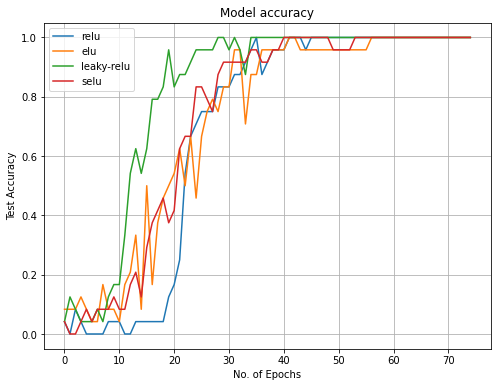

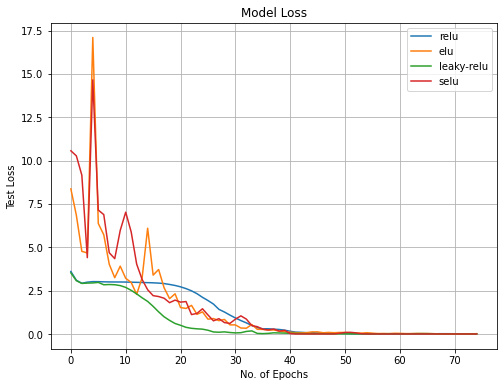

In [32]:
plot_results(results_new, activation_list)

Here it is seen that <b> 'leaky-relu' </b> and <b> 'relu' </b> both perform well with minimum loss at lower epochs as compared to other activation functions

Looking at the plots above all activation functions converge with minimum loss and high accuracy at training and validation set but <b> 'leaky-relu' </b> is able to converge for higher accuracy at lower epochs with minimum loss, so we choose <b> 'leaky-relu' </b> for final model training and plotting results.

In [33]:
activation_func_final ='leaky-relu'

model_final = cnn_model(activation=activation_func_final,
                    dropout_rate=0.2,
                    optimizer=Adam(clipvalue=0.5)) #using 'adam' optimizer with clipvalue of 0.5

history_final = model_final.fit(np.array(x_train), np.array(y_train), 
                    batch_size=512,
                    epochs=75, 
                    verbose=2,
                    validation_data=(np.array(x_valid),np.array(y_valid)))

Epoch 1/75
1/1 - 0s - loss: 3.0227 - accuracy: 0.0509 - val_loss: 3.3781 - val_accuracy: 0.0000e+00
Epoch 2/75
1/1 - 0s - loss: 3.9394 - accuracy: 0.0417 - val_loss: 2.9603 - val_accuracy: 0.1667
Epoch 3/75
1/1 - 0s - loss: 3.9321 - accuracy: 0.0787 - val_loss: 2.8888 - val_accuracy: 0.0833
Epoch 4/75
1/1 - 0s - loss: 3.2816 - accuracy: 0.0463 - val_loss: 3.0333 - val_accuracy: 0.0417
Epoch 5/75
1/1 - 0s - loss: 2.9845 - accuracy: 0.0880 - val_loss: 2.9694 - val_accuracy: 0.0000e+00
Epoch 6/75
1/1 - 0s - loss: 2.9109 - accuracy: 0.1157 - val_loss: 2.7385 - val_accuracy: 0.1667
Epoch 7/75
1/1 - 0s - loss: 3.5470 - accuracy: 0.0602 - val_loss: 3.0208 - val_accuracy: 0.0833
Epoch 8/75
1/1 - 0s - loss: 2.8829 - accuracy: 0.1389 - val_loss: 3.0583 - val_accuracy: 0.0000e+00
Epoch 9/75
1/1 - 0s - loss: 2.8753 - accuracy: 0.1481 - val_loss: 2.9957 - val_accuracy: 0.0000e+00
Epoch 10/75
1/1 - 0s - loss: 2.7962 - accuracy: 0.1435 - val_loss: 2.9133 - val_accuracy: 0.0417
Epoch 11/75
1/1 - 0s - 

In [36]:
result_score = model_final.evaluate(np.array(x_test),np.array(y_test),verbose=0)

print('Test Loss {:.4f}'.format(result_score[0]))
print('Test Accuracy {:.4f}'.format(result_score[1]))

Test Loss 0.2434
Test Accuracy 0.9375


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


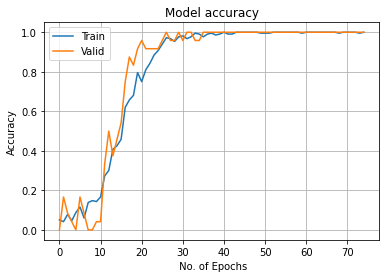

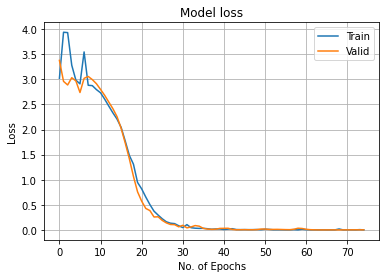

In [37]:
# Data in history

print(history_final.history.keys())

# Plotting Accuracy for final model
plt.plot(history_final.history['accuracy'])
plt.plot(history_final.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel(' No. of Epochs')
plt.legend(['Train', 'Valid'])
plt.grid()
plt.show()

# Plotting Loss for Final Model
plt.plot(history_final.history['loss'])
plt.plot(history_final.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('No. of Epochs')
plt.legend(['Train', 'Valid'])
plt.grid()
plt.show()

<h4> Conclusion </h4>

Here in this project we analyzed ORL faces images (train and test sets were given). We used CNN method to build the model and train it.

The analysis for different activation functions is fisrt observed to find that 'leaky-relu' activation function is one of the activation functions that can be used for out final model

The model training is done using x_train and y_train with validation data as x_valid and y_valid. owever for evaluating model, we use x_test and y_test which gives us <b> loss ~0.2435 </b>  with <b> an accuracy of 93.75% </b>